In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.stan to exe file C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.hpp C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.stan
Warning in 'C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.stan', line 7, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-

In [4]:
samples = gen_quant.sample(data={'M':7}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [14]:
#Create a pandas dataframe from resulting draws.
df1 = pd.read_csv('code_1-20220308112831.csv', skiprows = 37)
df1.dropna(inplace = True)
df1.index = df1.index+1
df1

,lp__,accept_stat__,lambda,y_sim.1,y_sim.2,y_sim.3,y_sim.4,y_sim.5,y_sim.6,y_sim.7
1,0,0.0,63.44830,51.0,54.0,60.0,66.0,63.0,58.0,59.0
2,0,0.0,77.24600,59.0,67.0,84.0,89.0,80.0,76.0,85.0
3,0,0.0,81.61250,84.0,86.0,77.0,81.0,98.0,91.0,85.0
4,0,0.0,72.00360,65.0,79.0,64.0,75.0,75.0,68.0,59.0
5,0,0.0,155.11800,162.0,156.0,157.0,142.0,179.0,145.0,160.0
...,...,...,...,...,...,...,...,...,...,...
996,0,0.0,21.64490,21.0,15.0,30.0,27.0,18.0,16.0,27.0
997,0,0.0,157.17600,159.0,147.0,144.0,152.0,147.0,164.0,174.0
998,0,0.0,1.78264,1.0,0.0,3.0,1.0,0.0,0.0,1.0
999,0,0.0,90.37050,99.0,95.0,96.0,72.0,89.0,94.0,101.0


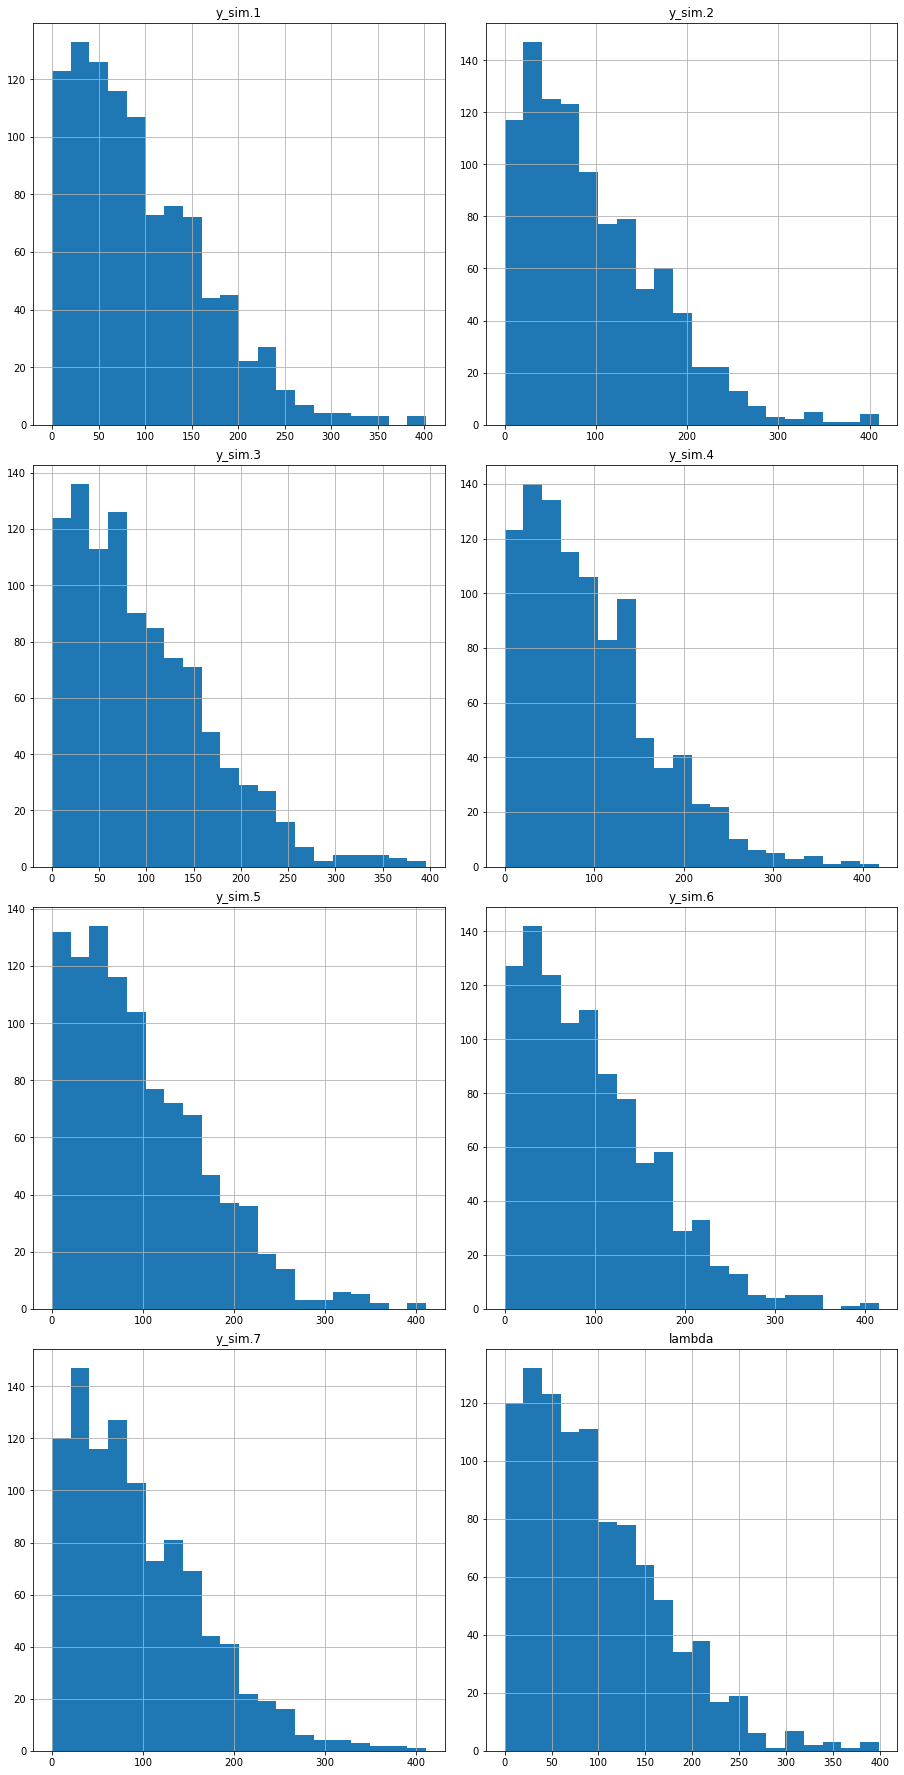

In [26]:
#Plot a histogram for each of y_sim and lambda

f, ax = plt.subplots(4,2, figsize=(15,30))
df1.hist('y_sim.1',bins = 20, ax=ax[0][0])
df1.hist('y_sim.2',bins = 20, ax=ax[0][1])
df1.hist('y_sim.3',bins = 20, ax=ax[1][0])
df1.hist('y_sim.4',bins = 20, ax=ax[1][1])
df1.hist('y_sim.5',bins = 20, ax=ax[2][0])
df1.hist('y_sim.6',bins = 20, ax=ax[2][1])
df1.hist('y_sim.7',bins = 20, ax=ax[3][0])
df1.hist('lambda', bins = 20, ax=ax[3][1])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)